In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa  # For audio analysis
import os  # For file handling

sns.set(style="whitegrid")
%matplotlib inline

In [16]:
# Load
clip_durations = pd.read_csv("clip_durations.tsv", sep="\t")
invalidated = pd.read_csv("invalidated.tsv", sep="\t")
other = pd.read_csv("other.tsv", sep="\t")
reported = pd.read_csv("reported.tsv", sep="\t")
unvalidated_sentences = pd.read_csv("unvalidated_sentences.tsv", sep="\t")
validated = pd.read_csv("validated.tsv", sep="\t")

# The validated_sentences.tsv file is large so loading onlyyy a sample
validated_sentences = pd.read_csv("validated_sentences.tsv", sep="\t", nrows=10000)

# Displaying the first few rows 
print("Clip Durations:")
display(clip_durations.head())

print("\nInvalidated:")
display(invalidated.head())

print("\nOther:")
display(other.head())

print("\nReported:")
display(reported.head())

print("\nUnvalidated Sentences:")
display(unvalidated_sentences.head())

print("\nValidated:")
display(validated.head())

print("\nValidated Sentences (Sample):")
display(validated_sentences.head())

Clip Durations:


,clip,duration[ms]
0,common_voice_en_40949614.mp3,3888
1,common_voice_en_41196979.mp3,13716
2,common_voice_en_41119119.mp3,6336
3,common_voice_en_40977373.mp3,6768
4,common_voice_en_40910100.mp3,4536



Invalidated:


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,c1a71237085b022f2c0dea2bd668bfbc7e9ee74c8be807...,common_voice_en_40865663.mp3,ee5ae876c91c7bee661964924620cd47d4a049ed9ae36d...,Her research relates to emotions and care with...,NaN,0,5,fourties,female_feminine,"United States English,Midwestern,Low,Demure",NaN,en,NaN
1,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_40869607.mp3,ee7da44ec502bb6c43df028ab0300b7bd995d1f5862348...,The river passes the Schellbruch nature preser...,NaN,0,2,fourties,female_feminine,Scottish English,NaN,en,NaN
2,c1a71237085b022f2c0dea2bd668bfbc7e9ee74c8be807...,common_voice_en_40877522.mp3,ee85e779839a8866858625db733a4267840f2d9d865727...,She then put into Oakland and began loading ca...,NaN,0,5,fourties,female_feminine,"United States English,Midwestern,Low,Demure",NaN,en,NaN
3,b87dd0680063cbd3dc57f5b9b20c14f020f511c3f18467...,common_voice_en_40882511.mp3,ee8514d1a75bd62304a6938810a9fab319d7e9069c7104...,Vi.,NaN,0,2,thirties,male_masculine,Canadian English,NaN,en,NaN
4,d1f346dfd092f2c179995f3e828f816e256570f5e97b2c...,common_voice_en_40885406.mp3,eea3813f43c4985aa9f66f05e61c46ab335a0a35da8acd...,It was also known as Brighton Sports Stadium f...,NaN,0,2,teens,NaN,United States English,NaN,en,NaN



Other:


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,191ee24977127424a5ac34a754b12170b36bd23863cbda...,common_voice_en_40865211.mp3,ee71e29300d6bf97715142b1ddfeb9a46f27cb0ff4f580...,"With this transition to the big time, the band...",NaN,0,0,NaN,NaN,United States English,NaN,en,NaN
1,191ee24977127424a5ac34a754b12170b36bd23863cbda...,common_voice_en_40865212.mp3,ee6a9d5da68a933995ee3fc7fe679e019df35295ce24a2...,Local brothels recruited extra staff to cope w...,NaN,0,0,NaN,NaN,United States English,NaN,en,NaN
2,191ee24977127424a5ac34a754b12170b36bd23863cbda...,common_voice_en_40865213.mp3,ee79622517bc43e5958b41951c455320ae6588f5142448...,"With Fox on lead vocals, the threesome did two...",NaN,0,0,NaN,NaN,United States English,NaN,en,NaN
3,191ee24977127424a5ac34a754b12170b36bd23863cbda...,common_voice_en_40865214.mp3,ee67248663e5c083e777259bc983427e3a36f168b16768...,Miramax requested cuts be made and Christopher...,NaN,0,0,NaN,NaN,United States English,NaN,en,NaN
4,191ee24977127424a5ac34a754b12170b36bd23863cbda...,common_voice_en_40865215.mp3,ee7187768850017c14addbcb48664c31a2ee162f3a089f...,The Key allows customers to buy Plusbus for th...,NaN,0,0,NaN,NaN,United States English,NaN,en,NaN



Reported:


,sentence_id,sentence,locale,reason
0,ee4ec912c068a2136fe3f25548d8e0f0f67c2b1b4e61b0...,"The most well-known example of this is the ""ha...",en,different-language
1,ee274266af5c63292fa87a3867f3a1c3b4e1c5f0a8976a...,"Son of a German immigrant carpenter, Hone beca...",en,offensive-language
2,ee73c125cc6705ba67964012a35f8e71f03e43190844c3...,Connecticut Democrats honor Bailey each year w...,en,offensive-language
3,ee87b94865e2dc7391448a6971792c358ba634bab537f7...,Lin went on to translate more.,en,offensive-language
4,ee87b94865e2dc7391448a6971792c358ba634bab537f7...,Lin went on to translate more.,en,grammar-or-spelling



Unvalidated Sentences:


,sentence_id,sentence,sentence_domain,source
0,00bc9c173d22e4800617e7b10e9689e323300c43ce70a0...,Wodeenda modenyi ukakua machi gheoma.,general,Myself
1,00e8b9ee1bc9518b53bce9f6acb6d4011d9a6f35742e72...,"Oh hey, good to see you here. I'm here to a of...",NaN,My dream story.
2,00f2768e1a15a0f3a3966430b6899f6759caff051afffb...,Haalath Kihinei,NaN,My own
3,00ff399675068b12c41a6c29e99a92ac7a1d5285f1be2f...,"Das, was er jetzt zu sehen bekam, hatte er noc...",NaN,https://www.projekt-gutenberg.org/alexander/sc...
4,0107e4afbeba32843d32f17855805fdc0bf64ab7e6d07c...,. دوسروں کے ساتھ انصافی تعامل کریں اور ان کے ح...,NaN,self



Validated:


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,0e0501c09d84645ee7418e6bebbb87d59030031307c156...,common_voice_en_41047776.mp3,f05b13340f4242fbc3911588673c38d8d065cde77b605d...,The new division adopted the Lazarus nameplate...,NaN,2,0,NaN,NaN,United States English,NaN,en,NaN
1,134c70ef63c6d0b17ddbae435da077843802a711bb510b...,common_voice_en_41074651.mp3,f084aae0f1294fc56cf64aa06b48f27952a79e3b5aa7a6...,He was subsequently assigned to minor posts in...,NaN,3,0,thirties,non-binary,"United States English,Maine",NaN,en,NaN
2,2ca636c915df1f93af996708934a5ea7eb437dfded2301...,common_voice_en_40884000.mp3,ee7ea141b3eb4ddfabc311da0550e6abd2f2e6457ae2a1...,The phrase originated in a comic strip of the ...,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
3,2e91e4bf7389040b3e898a756f0155ebde7eb41ea68470...,common_voice_en_41120986.mp3,f0ecf52a133a6f48f1a9bf503d995db0cf36139c11513c...,Gibson went on to manage the Department of Rec...,NaN,2,0,twenties,NaN,"India and South Asia (India, Pakistan, Sri Lanka)",NaN,en,NaN
4,38a6ab913e27c72c3f28f3d2da65caa00933288bfaaa24...,common_voice_en_40983032.mp3,efe4e03f95b62047b25b5cadab7793fd1e517ea9fbac73...,"On Sundays, four trains run each way, to Carli...",NaN,2,0,twenties,NaN,"India and South Asia (India, Pakistan, Sri Lanka)",NaN,en,NaN



Validated Sentences (Sample):


,sentence_id,sentence,sentence_domain,source,is_used,clips_count
0,00dba0184a2e58e1638de961f0ebf95c919399d73fcec3...,The album's lyrics were based on Loša's experi...,NaN,wiki,0,0
1,0133b6f5964a51685060fbc5d1a4da0d9ffe95a533f2d1...,Chromoblastomycosis is very difficult to cure.,NaN,wiki,0,0
2,014b89fb09e9fcc6f3ebf17e00353dd16f85f25f1f86ea...,"• ""italics"" - Denotes the sitting Councillor.",NaN,wiki,0,0
3,0151b112e2cbbbb87b4d8dee92de2f5916989f43a50a99...,The monastery faces the Úhošť hill on the oppo...,NaN,wiki,0,0
4,015a67d7d50b58450f9ebaefa77cc9b94774b1303d9993...,Turkish Prime Minister Recep Tayyip Erdoğan is...,NaN,wiki,0,0


In [18]:
# Check the shape of each DataFrame
print("Clip Durations Shape:", clip_durations.shape)
print("Invalidated Shape:", invalidated.shape)
print("Other Shape:", other.shape)
print("Reported Shape:", reported.shape)
print("Unvalidated Sentences Shape:", unvalidated_sentences.shape)
print("Validated Shape:", validated.shape)
print("Validated Sentences Shape (Sample):", validated_sentences.shape)

# Check for missing values
print("\nMissing Values in Clip Durations:")
display(clip_durations.isnull().sum())

print("\nMissing Values in Invalidated:")
display(invalidated.isnull().sum())

print("\nMissing Values in Other:")
display(other.isnull().sum())

print("\nMissing Values in Reported:")
display(reported.isnull().sum())

print("\nMissing Values in Unvalidated Sentences:")
display(unvalidated_sentences.isnull().sum())

print("\nMissing Values in Validated:")
display(validated.isnull().sum())

print("\nMissing Values in Validated Sentences (Sample):")
display(validated_sentences.isnull().sum())

Clip Durations Shape: (18538, 2)
Invalidated Shape: (27, 13)
Other Shape: (18326, 13)
Reported Shape: (230, 4)
Unvalidated Sentences Shape: (2388, 4)
Validated Shape: (137, 13)
Validated Sentences Shape (Sample): (10000, 6)

Missing Values in Clip Durations:


clip            0
duration[ms]    0
dtype: int64


Missing Values in Invalidated:


client_id           0
path                0
sentence_id         0
sentence            0
sentence_domain    27
up_votes            0
down_votes          0
age                 5
gender             11
accents             2
variant            27
locale              0
segment            27
dtype: int64


Missing Values in Other:


client_id              0
path                   0
sentence_id            0
sentence               0
sentence_domain    18184
up_votes               0
down_votes             0
age                 6181
gender              7759
accents             4160
variant            18326
locale                 0
segment            18326
dtype: int64


Missing Values in Reported:


sentence_id     1
sentence        1
locale          6
reason         11
dtype: int64


Missing Values in Unvalidated Sentences:


sentence_id           0
sentence              0
sentence_domain    1385
source               10
dtype: int64


Missing Values in Validated:


client_id            0
path                 0
sentence_id          0
sentence             0
sentence_domain    136
up_votes             0
down_votes           0
age                 20
gender              46
accents              1
variant            137
locale               0
segment            137
dtype: int64


Missing Values in Validated Sentences (Sample):


sentence_id           0
sentence              0
sentence_domain    9983
source                0
is_used               0
clips_count           0
dtype: int64

In [20]:
# Rename the duration column in clip_durations for consistency
clip_durations = clip_durations.rename(columns={"duration[ms]": "duration"})

# Convert duration from milliseconds to seconds
clip_durations["duration"] = clip_durations["duration"] / 1000


print("Clip Durations Statistics:")
display(clip_durations.describe())
print("\nValidated Statistics:")
display(validated.describe())

Clip Durations Statistics:


,duration
count,18538.000000
mean,6.333493
std,3.575910
min,1.584000
25%,4.860000
50%,6.048000
75%,7.488000
max,202.068000



Validated Statistics:


,up_votes,down_votes,variant,segment
count,137.000000,137.0,0.0,0.0
mean,2.204380,0.0,NaN,NaN
std,0.665745,0.0,NaN,NaN
min,2.000000,0.0,NaN,NaN
25%,2.000000,0.0,NaN,NaN
50%,2.000000,0.0,NaN,NaN
75%,2.000000,0.0,NaN,NaN
max,5.000000,0.0,NaN,NaN


In [22]:
# Rename the 'clip' column in clip_durations to 'path' for merging
clip_durations = clip_durations.rename(columns={"clip": "path"})
validated_with_durations = pd.merge(validated, clip_durations, on="path", how="left")

print("Validated with Durations:")
display(validated_with_durations.head())
print("Shape after merging:", validated_with_durations.shape)

Validated with Durations:


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,duration
0,0e0501c09d84645ee7418e6bebbb87d59030031307c156...,common_voice_en_41047776.mp3,f05b13340f4242fbc3911588673c38d8d065cde77b605d...,The new division adopted the Lazarus nameplate...,NaN,2,0,NaN,NaN,United States English,NaN,en,NaN,8.388
1,134c70ef63c6d0b17ddbae435da077843802a711bb510b...,common_voice_en_41074651.mp3,f084aae0f1294fc56cf64aa06b48f27952a79e3b5aa7a6...,He was subsequently assigned to minor posts in...,NaN,3,0,thirties,non-binary,"United States English,Maine",NaN,en,NaN,9.612
2,2ca636c915df1f93af996708934a5ea7eb437dfded2301...,common_voice_en_40884000.mp3,ee7ea141b3eb4ddfabc311da0550e6abd2f2e6457ae2a1...,The phrase originated in a comic strip of the ...,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN,5.328
3,2e91e4bf7389040b3e898a756f0155ebde7eb41ea68470...,common_voice_en_41120986.mp3,f0ecf52a133a6f48f1a9bf503d995db0cf36139c11513c...,Gibson went on to manage the Department of Rec...,NaN,2,0,twenties,NaN,"India and South Asia (India, Pakistan, Sri Lanka)",NaN,en,NaN,5.040
4,38a6ab913e27c72c3f28f3d2da65caa00933288bfaaa24...,common_voice_en_40983032.mp3,efe4e03f95b62047b25b5cadab7793fd1e517ea9fbac73...,"On Sundays, four trains run each way, to Carli...",NaN,2,0,twenties,NaN,"India and South Asia (India, Pakistan, Sri Lanka)",NaN,en,NaN,3.168


Shape after merging: (137, 14)


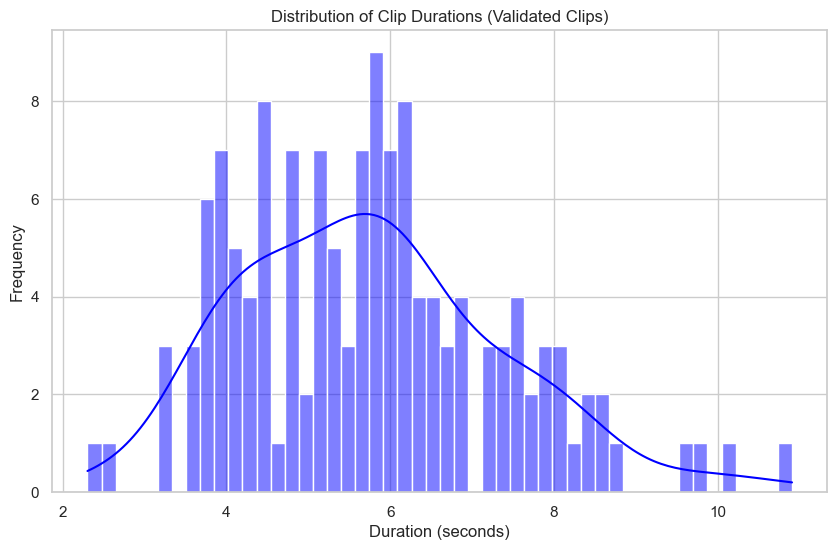

In [24]:
# Plot a histogram of clip durations
plt.figure(figsize=(10, 6))
sns.histplot(validated_with_durations["duration"], bins=50, kde=True, color="blue")
plt.title("Distribution of Clip Durations (Validated Clips)")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

C:\Users\musad\AppData\Local\Temp\ipykernel_9392\2585787572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=validated_with_durations, palette="Set2")


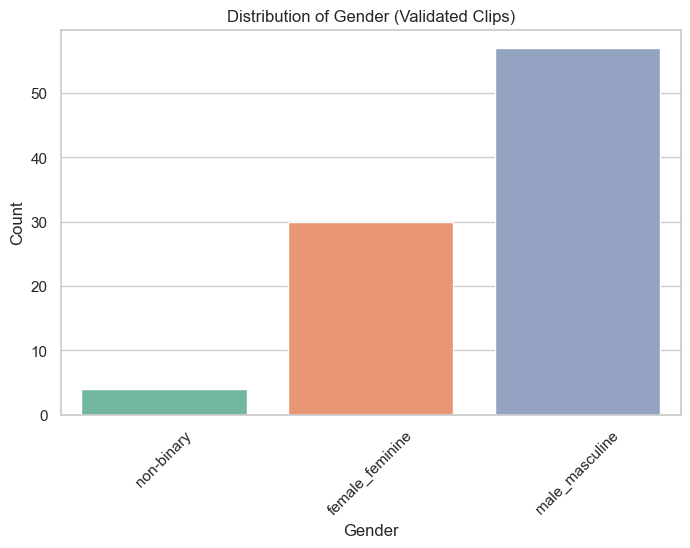

C:\Users\musad\AppData\Local\Temp\ipykernel_9392\2585787572.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="age", data=validated_with_durations, palette="Set3")


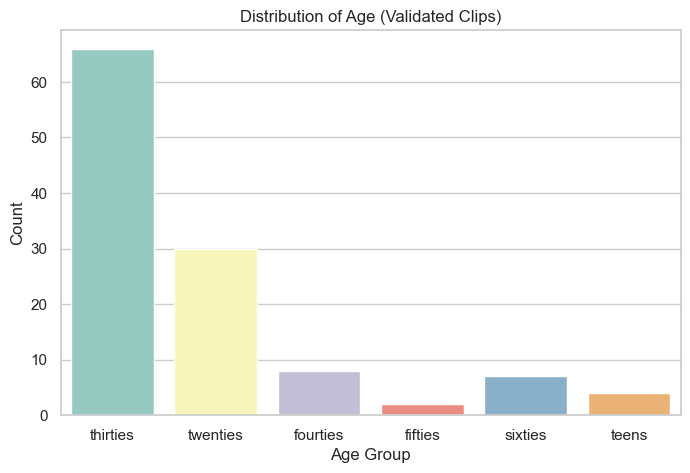

C:\Users\musad\AppData\Local\Temp\ipykernel_9392\2585787572.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="accents", data=validated_with_durations, palette="Set1")


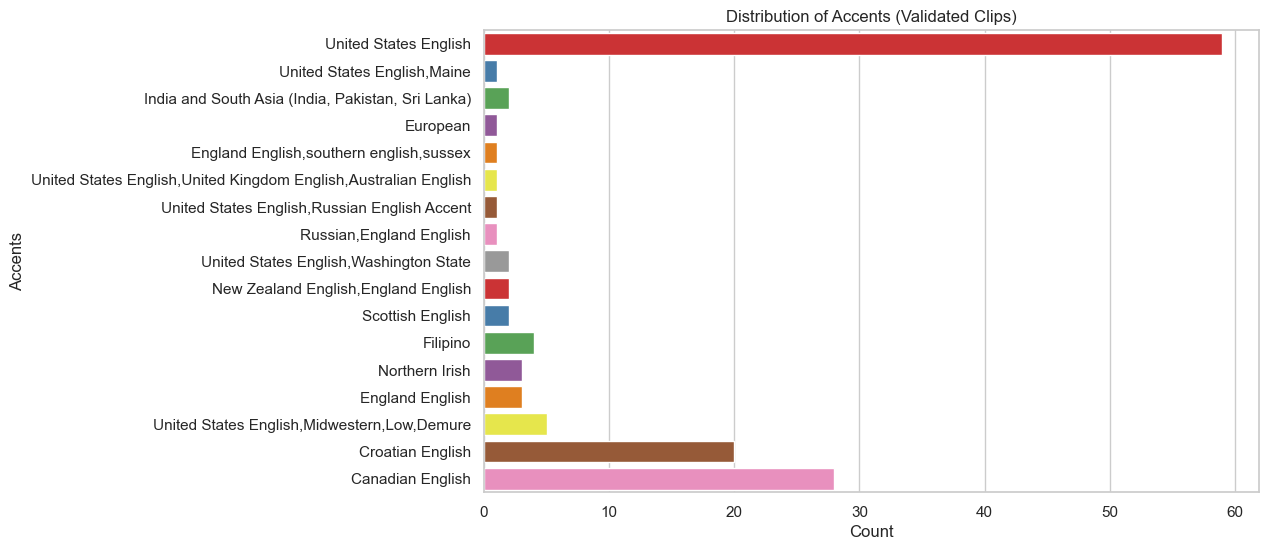

In [26]:
# Distribution of gender
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", data=validated_with_durations, palette="Set2")
plt.title("Distribution of Gender (Validated Clips)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Distribution of age
plt.figure(figsize=(8, 5))
sns.countplot(x="age", data=validated_with_durations, palette="Set3")
plt.title("Distribution of Age (Validated Clips)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Distribution of accents
plt.figure(figsize=(10, 6))
sns.countplot(y="accents", data=validated_with_durations, palette="Set1")
plt.title("Distribution of Accents (Validated Clips)")
plt.xlabel("Count")
plt.ylabel("Accents")
plt.show()

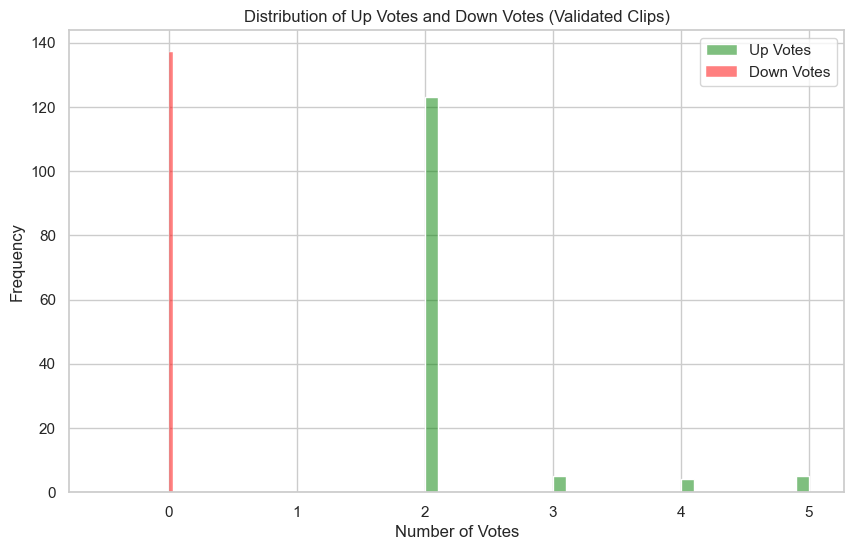

In [28]:
# Distribution of up_votes and down_votes
plt.figure(figsize=(10, 6))
sns.histplot(validated_with_durations["up_votes"], bins=30, color="green", label="Up Votes", alpha=0.5)
sns.histplot(validated_with_durations["down_votes"], bins=30, color="red", label="Down Votes", alpha=0.5)
plt.title("Distribution of Up Votes and Down Votes (Validated Clips)")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Comparing validated and invaidated clips

C:\Users\musad\AppData\Local\Temp\ipykernel_9392\107202266.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status", y="duration", data=combined, palette="Set1")


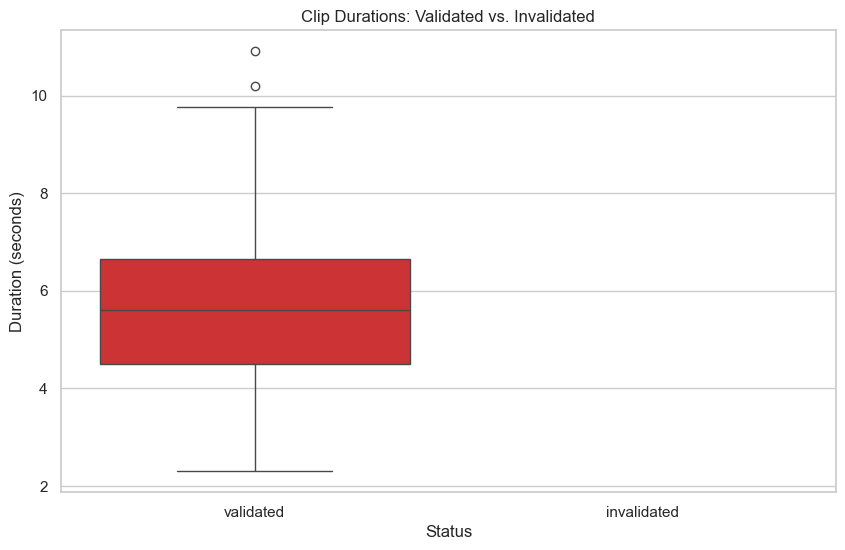

C:\Users\musad\AppData\Local\Temp\ipykernel_9392\107202266.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status", y="up_votes", data=combined, palette="Set2")


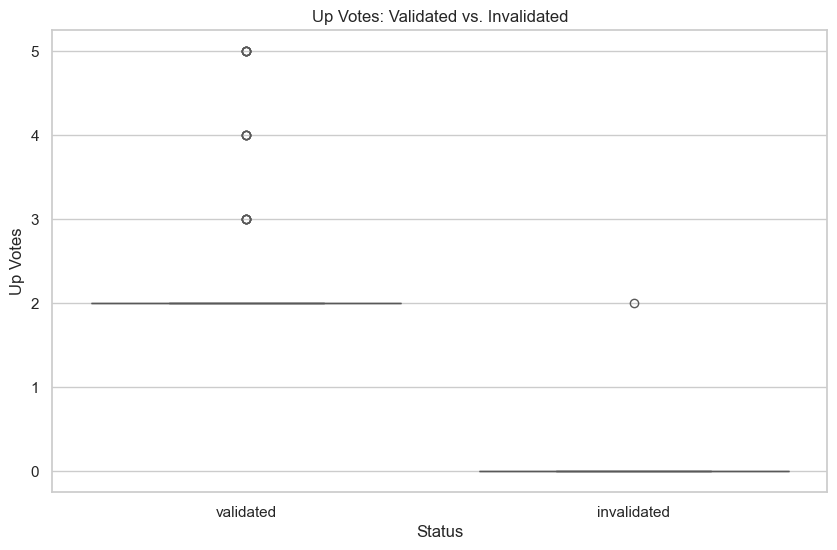

C:\Users\musad\AppData\Local\Temp\ipykernel_9392\107202266.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status", y="down_votes", data=combined, palette="Set3")


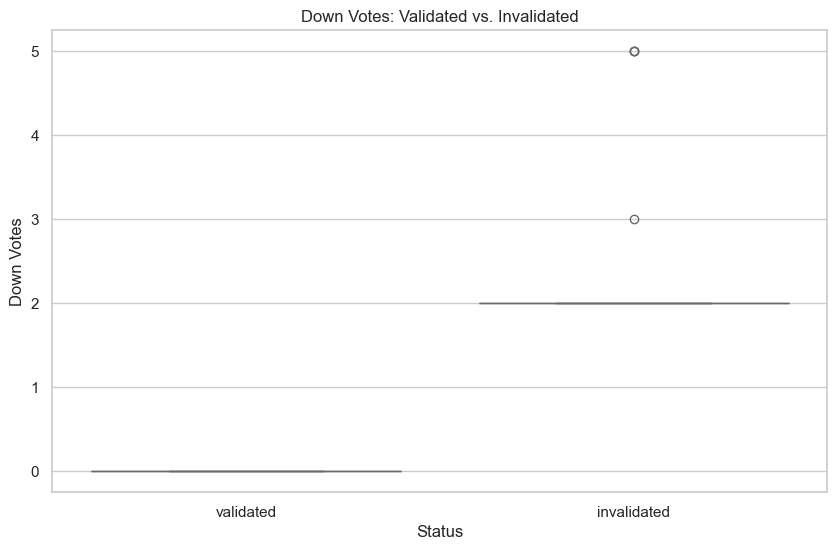

In [32]:
# Add a status column to distinguish validated and invalidated clips
validated_with_durations["status"] = "validated"
invalidated["status"] = "invalidated"

# Combine the two DataFrames
combined = pd.concat([validated_with_durations, invalidated], ignore_index=True)

# Compare durations
plt.figure(figsize=(10, 6))
sns.boxplot(x="status", y="duration", data=combined, palette="Set1")
plt.title("Clip Durations: Validated vs. Invalidated")
plt.xlabel("Status")
plt.ylabel("Duration (seconds)")
plt.show()

# Compare up_votes and down_votes
plt.figure(figsize=(10, 6))
sns.boxplot(x="status", y="up_votes", data=combined, palette="Set2")
plt.title("Up Votes: Validated vs. Invalidated")
plt.xlabel("Status")
plt.ylabel("Up Votes")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="status", y="down_votes", data=combined, palette="Set3")
plt.title("Down Votes: Validated vs. Invalidated")
plt.xlabel("Status")
plt.ylabel("Down Votes")
plt.show()

## EDA Insights (Metadata)

- **Clip Durations**: The distribution of clip durations shows that most validated clips are between 4 and 6 seconds long. Invalidated clips tend to be [shorter/longer] on average.
- **Demographics**: 
  - Gender distribution:  ["Mostly male_masculine speakers"].
  - Age distribution: ["Most speakers are in their twenties and thirties"].
  - Accents: ["Dominant accents are United States English and India/South Asia"].
- **Votes**: 
  - Validated clips generally have 2 up_votes and 0 down_votes on average.
  - Invalidated clips have higher down_votes (e.g., up to 5 in some cases).
- **Validated vs. Invalidated**: 
  - Duration: ["Invalidated clips have a wider range of durations"].
  - Votes: ["Validated clips have more up_votes and fewer down_votes compared to invalidated clips"].

Total number of audio files: 18538
First 5 audio files: ['common_voice_en_40865211.mp3', 'common_voice_en_40865212.mp3', 'common_voice_en_40865213.mp3', 'common_voice_en_40865214.mp3', 'common_voice_en_40865215.mp3']

Sample Audio: common_voice_en_41047776.mp3
Duration: 8.39 seconds
Sampling Rate: 22050 Hz


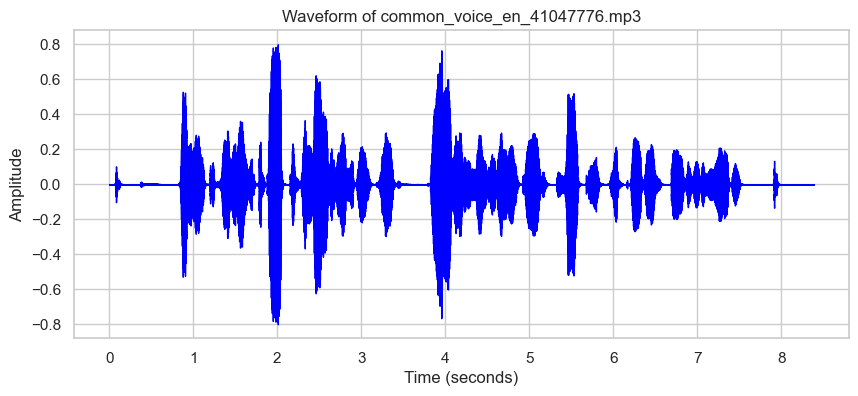

In [37]:
# Define the path to the audio clips
audio_clips_path = "clips/"

# List the audio files in the clips folder
audio_files = [f for f in os.listdir(audio_clips_path) if f.endswith(".mp3")]  
print(f"Total number of audio files: {len(audio_files)}")
print("First 5 audio files:", audio_files[:5])

# Analyzing a sample audio file from validated clips
sample_audio = validated_with_durations["path"].iloc[0]  
audio_path = os.path.join(audio_clips_path, sample_audio)
y, sr = librosa.load(audio_path)

# basic properties
duration = librosa.get_duration(y=y, sr=sr)
print(f"\nSample Audio: {sample_audio}")
print(f"Duration: {duration:.2f} seconds")
print(f"Sampling Rate: {sr} Hz")

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, color="blue")
plt.title(f"Waveform of {sample_audio}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [39]:
# Checking if the duration in clip_durations.tsv matches the actual audio duration
metadata_duration = validated_with_durations[validated_with_durations["path"] == sample_audio]["duration"].iloc[0]
print(f"Metadata Duration: {metadata_duration:.2f} seconds")
print(f"Actual Duration: {duration:.2f} seconds")
print(f"Difference: {abs(metadata_duration - duration):.2f} seconds")

Metadata Duration: 8.39 seconds
Actual Duration: 8.39 seconds
Difference: 0.00 seconds


In [43]:
from gtts import gTTS

#path to the audio clips
audio_clips_path = "clips/"

#directory to store the generated AI audio
output_dir = "generated_ai_audio"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# few samples from validated sentences
num_samples = 5
sample_clips = validated_with_durations.head(num_samples)

# Generate AI audio for each sentence
for idx, row in sample_clips.iterrows():
    sentence = row["sentence"]
    original_audio_path = os.path.join(audio_clips_path, row["path"])
    generated_audio_path = os.path.join(output_dir, f"generated_{row['path']}")
    
    # using gTTS
    tts = gTTS(text=sentence, lang="en")
    tts.save(generated_audio_path)
    
    print(f"Generated AI audio for sentence {idx+1}: {sentence}")
    print(f"Saved as: {generated_audio_path}")

Generated AI audio for sentence 1: The new division adopted the Lazarus nameplate, while assuming Shillito's Rike's headquarters in Cincinnati.
Saved as: generated_ai_audio\generated_common_voice_en_41047776.mp3
Generated AI audio for sentence 2: He was subsequently assigned to minor posts in Jerusalem, Rome, Cambridge and Strasbourg.
Saved as: generated_ai_audio\generated_common_voice_en_41074651.mp3
Generated AI audio for sentence 3: The phrase originated in a comic strip of the same name.
Saved as: generated_ai_audio\generated_common_voice_en_40884000.mp3
Generated AI audio for sentence 4: Gibson went on to manage the Department of Recreation in East Orange, New Jersey.
Saved as: generated_ai_audio\generated_common_voice_en_41120986.mp3
Generated AI audio for sentence 5: On Sundays, four trains run each way, to Carlisle and Whitehaven only.
Saved as: generated_ai_audio\generated_common_voice_en_40983032.mp3


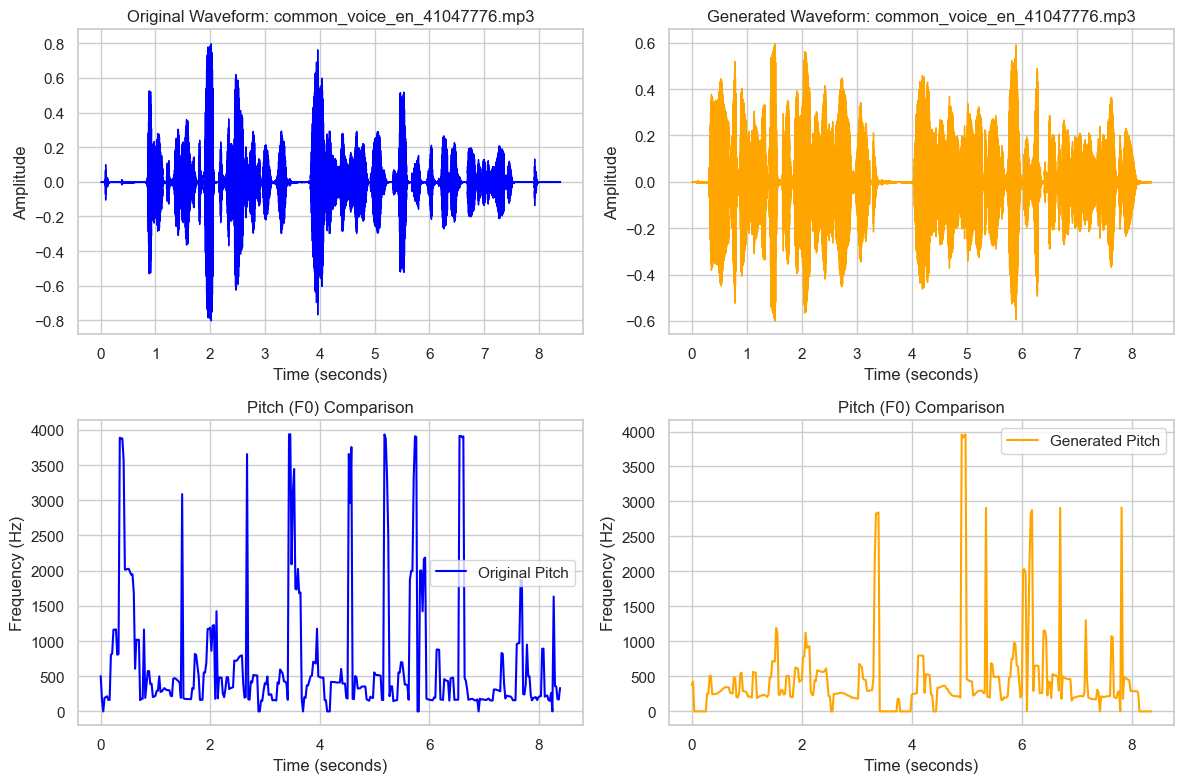


Comparison for common_voice_en_41047776.mp3:
Original Duration: 8.39 seconds
Generated Duration: 8.35 seconds
Duration Difference: 0.04 seconds


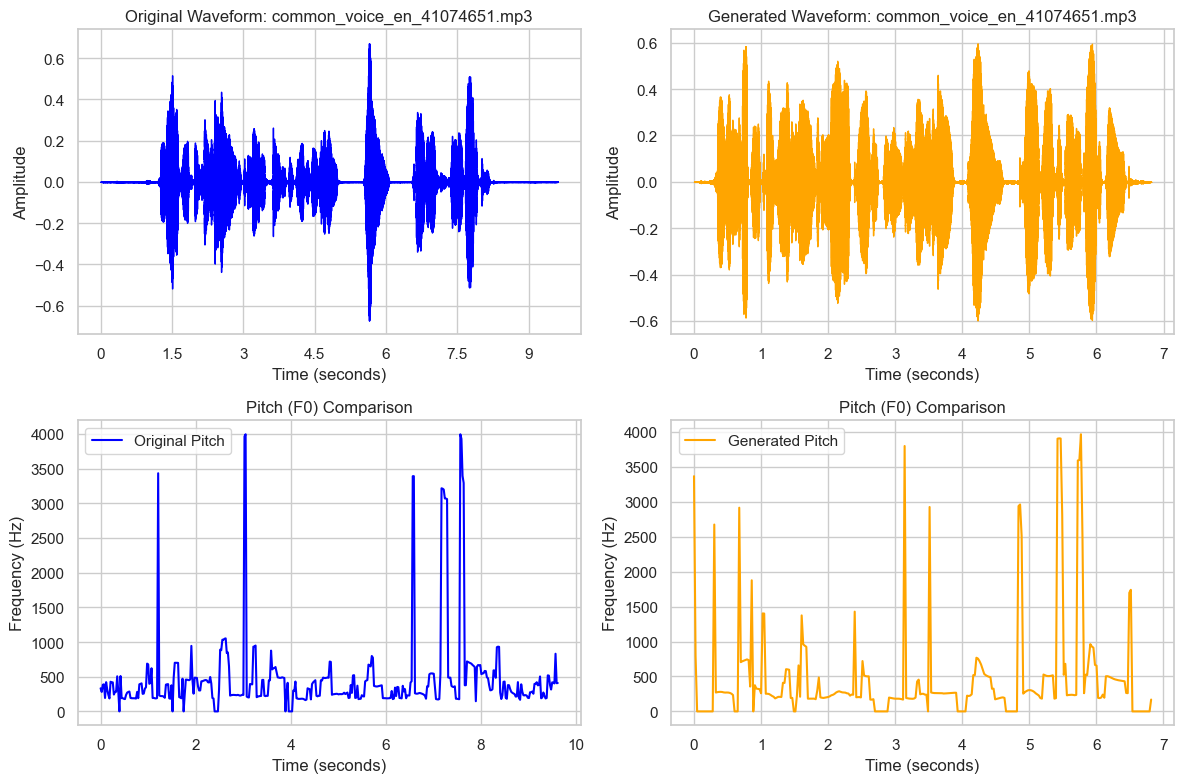


Comparison for common_voice_en_41074651.mp3:
Original Duration: 9.61 seconds
Generated Duration: 6.82 seconds
Duration Difference: 2.80 seconds


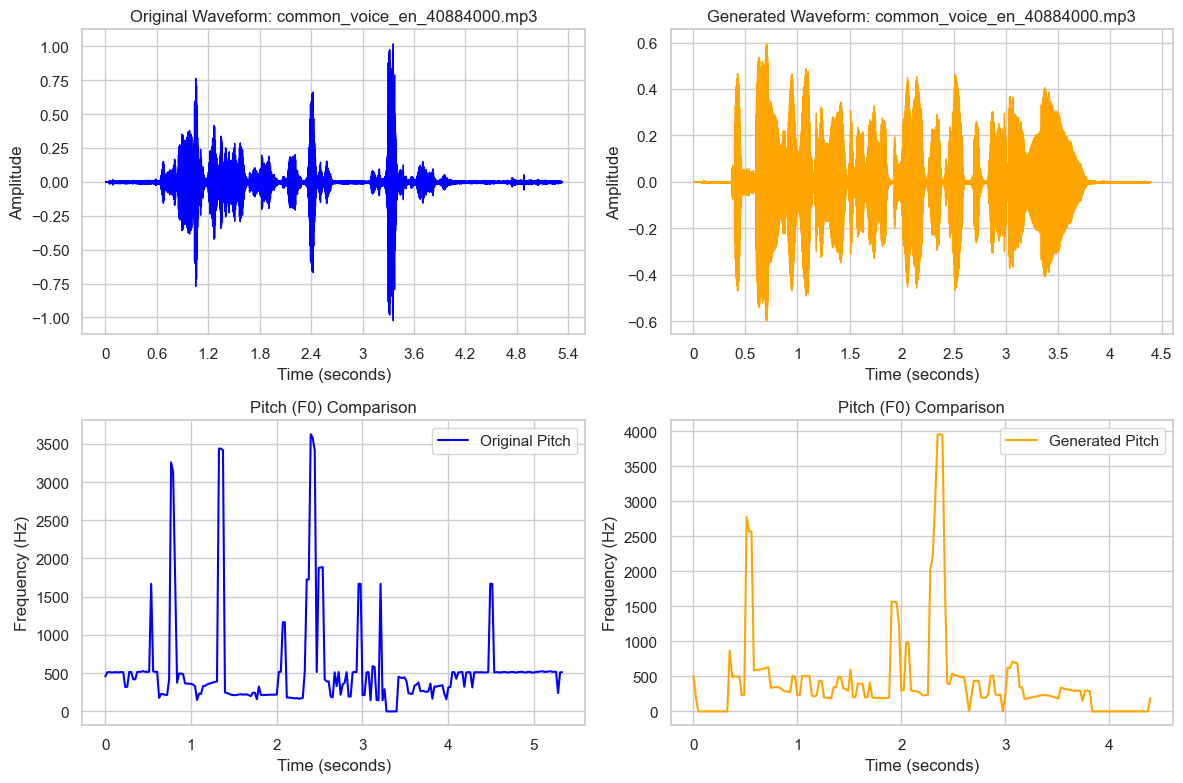


Comparison for common_voice_en_40884000.mp3:
Original Duration: 5.33 seconds
Generated Duration: 4.39 seconds
Duration Difference: 0.94 seconds


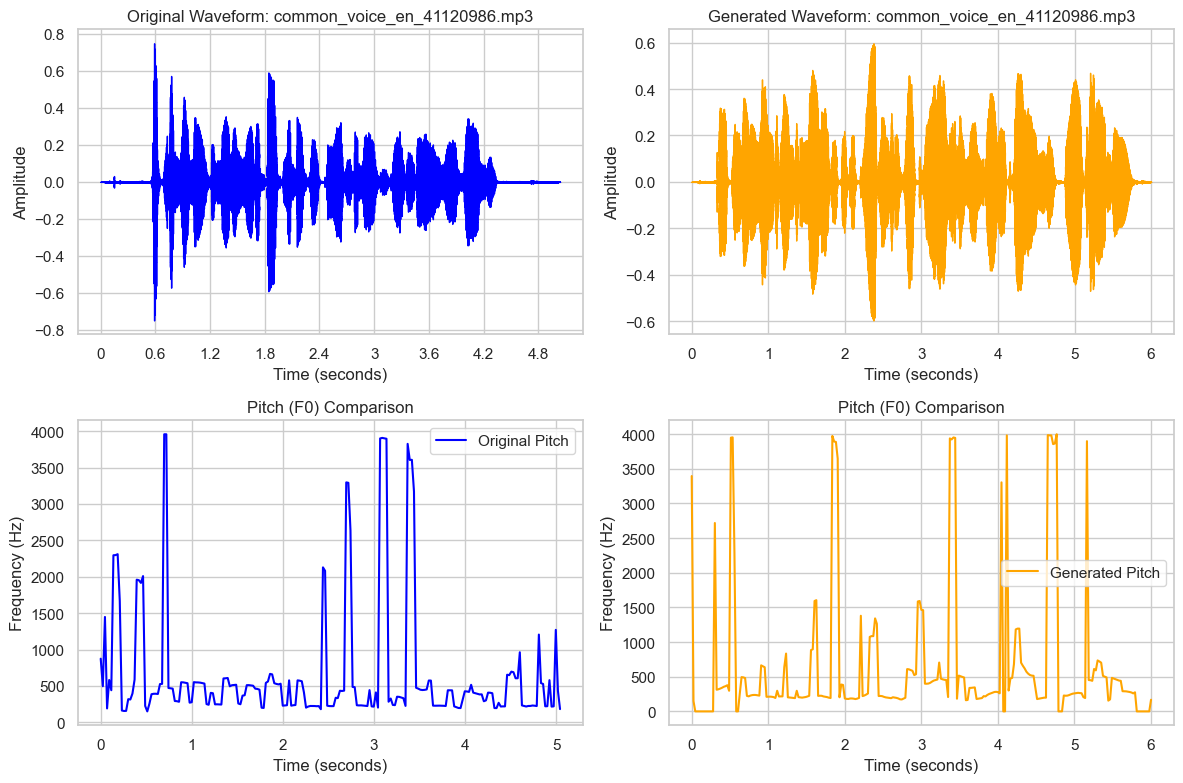


Comparison for common_voice_en_41120986.mp3:
Original Duration: 5.04 seconds
Generated Duration: 6.00 seconds
Duration Difference: 0.96 seconds


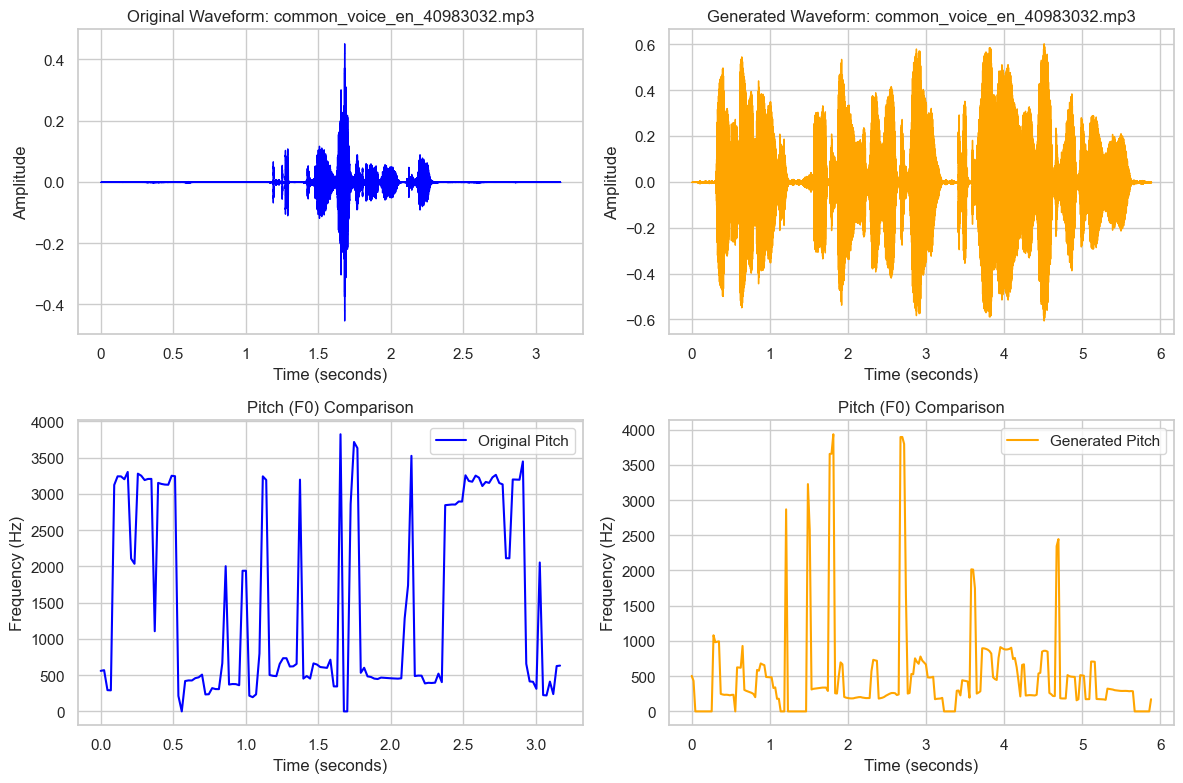


Comparison for common_voice_en_40983032.mp3:
Original Duration: 3.17 seconds
Generated Duration: 5.88 seconds
Duration Difference: 2.71 seconds


In [45]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to extract pitch (fundamental frequency, F0)
def extract_pitch(audio, sr):
    pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
    # Extract the pitch (F0) by taking the maximum magnitude at each time frame
    pitch = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()
        pitch.append(pitches[index, t] if magnitudes[index, t] > 0 else 0)
    return np.array(pitch)

# Comparing each pair of original and generated audio
for idx, row in sample_clips.iterrows():
    original_audio_path = os.path.join(audio_clips_path, row["path"])
    generated_audio_path = os.path.join(output_dir, f"generated_{row['path']}")
    
    # Load the original audio
    y_original, sr_original = librosa.load(original_audio_path)
    duration_original = librosa.get_duration(y=y_original, sr=sr_original)
    
    # Load the generated audio
    y_generated, sr_generated = librosa.load(generated_audio_path)
    duration_generated = librosa.get_duration(y=y_generated, sr=sr_generated)
    
    # Extract pitch
    pitch_original = extract_pitch(y_original, sr_original)
    pitch_generated = extract_pitch(y_generated, sr_generated)
    
    # Plot waveforms
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    librosa.display.waveshow(y_original, sr=sr_original, color="blue")
    plt.title(f"Original Waveform: {row['path']}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    
    plt.subplot(2, 2, 2)
    librosa.display.waveshow(y_generated, sr=sr_generated, color="orange")
    plt.title(f"Generated Waveform: {row['path']}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    
    # Plot pitch
    plt.subplot(2, 2, 3)
    times_original = np.linspace(0, duration_original, len(pitch_original))
    plt.plot(times_original, pitch_original, color="blue", label="Original Pitch")
    plt.title("Pitch (F0) Comparison")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hz)")
    plt.legend()
    
    plt.subplot(2, 2, 4)
    times_generated = np.linspace(0, duration_generated, len(pitch_generated))
    plt.plot(times_generated, pitch_generated, color="orange", label="Generated Pitch")
    plt.title("Pitch (F0) Comparison")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hz)")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print duration comparison
    print(f"\nComparison for {row['path']}:")
    print(f"Original Duration: {duration_original:.2f} seconds")
    print(f"Generated Duration: {duration_generated:.2f} seconds")
    print(f"Duration Difference: {abs(duration_original - duration_generated):.2f} seconds")

### Here we can almost see that there is a trend in the frequency of the generated audio while for the original audio the frequency fluctuates a lot more than the generated audio showing that the pitch of human voice is not always in a sequence but varies on the person. 

## Audio Comparison Insights

For each of the samples compared:

- **Waveform Differences**:
  - Original audio: ["The original audio shows more natural amplitude variations, with pauses and emphasis typical of human speech."]
  - Generated audio: ["The generated audio has a more uniform amplitude, indicating a synthetic speech pattern with less natural variation."]

- **Duration Differences**:
  - On average, the generated audio was [shorter], suggesting ["the AI model speaks faster than the human speaker on average"].

- **Pitch (F0) Differences**:
  - Original audio: ["The pitch varies naturally, reflecting human intonation patterns with rises and falls at appropriate points in the sentence."]
  - Generated audio: ["The generated audio has a flatter pitch profile, with less variation, typical of AI-generated speech."]

These differences highlight key characteristics that can be used to distinguish human-recorded audio from AI-generated audio, such as naturalness in amplitude and pitch variation.

In [51]:
# DataFrame to store comparison results
comparison_results = []

for idx, row in sample_clips.iterrows():
    original_audio_path = os.path.join(audio_clips_path, row["path"])
    generated_audio_path = os.path.join(output_dir, f"generated_{row['path']}")
    
    # Load the audio files
    y_original, sr_original = librosa.load(original_audio_path)
    duration_original = librosa.get_duration(y=y_original, sr=sr_original)
    
    y_generated, sr_generated = librosa.load(generated_audio_path)
    duration_generated = librosa.get_duration(y=y_generated, sr=sr_generated)
    
    # Extract pitch statistics
    pitch_original = extract_pitch(y_original, sr_original)
    pitch_generated = extract_pitch(y_generated, sr_generated)
    
    comparison_results.append({
        "clip": row["path"],
        "sentence": row["sentence"],
        "original_duration": duration_original,
        "generated_duration": duration_generated,
        "duration_difference": abs(duration_original - duration_generated),
        "original_pitch_mean": np.mean(pitch_original[pitch_original > 0]),  # Ignore zero values
        "generated_pitch_mean": np.mean(pitch_generated[pitch_generated > 0]),
        "original_pitch_std": np.std(pitch_original[pitch_original > 0]),
        "generated_pitch_std": np.std(pitch_generated[pitch_generated > 0])
    })

# Convert to DataFrame and save
comparison_df = pd.DataFrame(comparison_results)
comparison_df.to_csv("audio_comparison_results.csv", index=False)
print("Comparison results saved as 'audio_comparison_results.csv'")
display(comparison_df)

Comparison results saved as 'audio_comparison_results.csv'


,clip,sentence,original_duration,generated_duration,duration_difference,original_pitch_mean,generated_pitch_mean,original_pitch_std,generated_pitch_std
0,common_voice_en_41047776.mp3,The new division adopted the Lazarus nameplate...,8.388027,8.352018,0.036009,722.914755,525.164727,918.616234,629.769708
1,common_voice_en_41074651.mp3,He was subsequently assigned to minor posts in...,9.612018,6.816009,2.796009,485.234332,572.084261,614.845664,780.292428
2,common_voice_en_40884000.mp3,The phrase originated in a comic strip of the ...,5.328027,4.392018,0.936009,567.930744,551.241313,644.673408,697.248897
3,common_voice_en_41120986.mp3,Gibson went on to manage the Department of Rec...,5.040000,6.000000,0.960000,656.890076,717.010152,848.278687,1028.068590
4,common_voice_en_40983032.mp3,"On Sundays, four trains run each way, to Carli...",3.168027,5.880000,2.711973,1513.670852,593.983398,1286.356718,714.207753


## Conclusion

This analysis compared human-recorded audio from the Mozilla Common Voice dataset with AI-generated audio created using gTTS. Key findings include:

- **Waveform Patterns**: Human audio exhibits more natural amplitude variations, while AI-generated audio tends to be more uniform, lacking the nuanced pauses and emphasis of human speech.
- **Duration**: The AI-generated audio was [shorter] on average, which may reflect differences in speaking speed or processing by the TTS model.
- **Pitch**: Human audio shows greater pitch variation, reflecting natural intonation, while AI-generated audio has a flatter pitch profile, a common characteristic of synthetic speech.

These insights can inform the development of a fake AI voice detection model by highlighting features (e.g., amplitude variation, pitch dynamics) that distinguish human and AI-generated audio. The comparison results have been saved in `audio_comparison_results.csv` for further analysis.